In [1]:
import pandas as pd
data = pd.read_csv("data_voiture_clean.csv")
for col in ["model","transmission","fuelType"]:
    data = pd.get_dummies(data,columns=[col],drop_first=True )

In [2]:
def getXy(standard =True):      
    X = data.drop(columns=["marque","price"]).values.reshape(-1,205)
    y = data["price"].values
    return X,y

In [3]:
from sklearn.model_selection import train_test_split 
def modifieXyTrainTest(X,y):
    Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, random_state = 2, test_size = 0.20)
    return Xtrain, Xtest, ytrain,ytest

In [4]:
X,y = getXy()

In [5]:
#import pandas as pd
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression
#reg = LinearRegression()
#def getXy(standard =True):
#    data = pd.read_csv("data_voiture_clean.csv")
#    for col in ["model","transmission","fuelType"]:
#        data = pd.get_dummies(data,columns=[col],drop_first=True )     
#    X = data.drop(columns=["marque","price"]).values.reshape(-1,205)
#    y = data["price"].values
#    Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, random_state = 42, test_size = 0.20)
#    return Xtrain, Xtest, ytrain,ytest
#Xtrain, Xtest,ytrain,ytest = getXy()
#reg.fit(Xtrain,ytrain)
#reg.score(Xtest,ytest)

In [6]:
# print(X)

In [7]:
# print(y)

In [8]:
Xtrain,Xtest,ytrain,ytest = modifieXyTrainTest(X,y)

## Isolation Forest

(1967.5, 2022.5, -25984.300000000003, 545692.3)

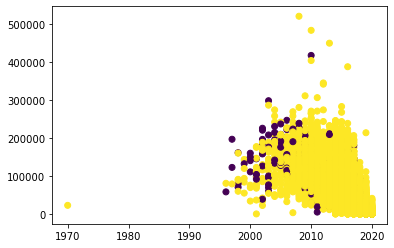

In [9]:
# import
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

modelIsolationForest = IsolationForest(contamination = 0.01, random_state=2, n_estimators=100)
modelIsolationForest.fit(Xtrain)
outliers = modelIsolationForest.predict(Xtrain)
Xtrain = Xtrain[outliers == 1]
ytrain = ytrain[outliers == 1]
plt.scatter(Xtrain[:,0],Xtrain[:,1], c = modelIsolationForest.fit_predict(Xtrain))
# axes= plt.gca()
# print(axes.set_xlim(0,4))
#print("Val axes : ",plt.axis())
plt.axis()

## Regression Lineaire

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
regLin = LinearRegression()

In [12]:
regLin.fit(Xtrain,ytrain)

LinearRegression()

In [13]:
regLin.score(Xtest,ytest)

0.8609438314624356

## Regression Lasso

In [14]:
from sklearn.linear_model import Lasso

In [15]:
regLasso = Lasso(alpha=0.1,max_iter=1000)

In [16]:
### entrainement du model
regLasso.fit(Xtrain,ytrain)

Lasso(alpha=0.1)

In [17]:
### resultat du model
regLasso.score(Xtest,ytest)

0.86084396735312

In [18]:
regLasso.predict(Xtest)

array([15215.98591875, 11424.81058865, 21014.8183734 , ...,
       17352.39204385, 32231.18412329, 44874.3343878 ])

In [19]:
ytest

array([18714,  8764, 18129, ..., 17304, 34492, 58499], dtype=int64)

In [20]:
from sklearn.model_selection import GridSearchCV
# lasso_params = {'alpha':[0.01, 0.05, 0.1, 0.15, 0.20]}
# 0.8788319872821607
# lasso_params = {'alpha':[0.005, 0.01, 0.015, 0.02, 0.025]}
# 0.8788348885954073
# lasso_params = {'alpha':[0.025,0.030,0.035]}
# 0.8788348885954073
lasso_params = {'alpha':[0.026]}

In [21]:
gridLasso =  GridSearchCV(regLasso, param_grid=lasso_params).fit(Xtrain, ytrain)
# regLasso2.best_estimator_   ==> permet d'avoir le "meilleur" alpha.
# regLasso2.best_estimator_  
# regLasso2.score(Xtest,ytest)

In [22]:
gridLasso.score(Xtest,ytest)

0.8609290644934438

## Regression Ridge

In [23]:
from sklearn.linear_model import Ridge

In [24]:
regRidge = Ridge(alpha = 0.1)

In [25]:
regRidge.fit(Xtrain, ytrain)

Ridge(alpha=0.1)

In [26]:
### resultat du model
regRidge.score(Xtest,ytest)

0.8609746189863152

In [27]:
regRidge.predict(Xtest)

array([15223.41432575, 11417.88021234, 21029.37033473, ...,
       17332.88819097, 32249.74377376, 44704.8332719 ])

In [28]:
ridge_params = {'alpha':[0.026]}

In [29]:
gridRidge =  GridSearchCV(regRidge, param_grid=ridge_params).fit(Xtrain, ytrain)

In [30]:
gridRidge.score(Xtest,ytest)

0.8609523847507177

## RandomForestRegressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
modelRandomForestRegressor = RandomForestRegressor(random_state=2)

In [33]:
modelRandomForestRegressor.fit(Xtrain,ytrain)

RandomForestRegressor(random_state=2)

In [34]:
modelRandomForestRegressor.score(Xtest,ytest)

0.9568010441774186

In [35]:
# from sklearn.model_selection import learning_curve



In [46]:
# n, train_score, val_score = learning_curve(modelRandomForestRegressor, Xtrain,ytrain,cv=5)


In [ ]:
# plt.plot(n, train_score.mean(axis=1),label='train_score')
# plt.plot(n, val_score.mean(axis=1),label='val_score')
# plt.legend()
# plt.show()

In [ ]:
# randomForest_params = {'max_depth':[50,100,None]}

In [ ]:
# gridRandomForest =  GridSearchCV(RandomForestRegressor(random_state=2), param_grid=randomForest_params).fit(Xtrain, ytrain)

## SVR

In [37]:
from sklearn.svm import SVR

In [38]:
modelSVR = SVR(kernel='linear',max_iter=100)

In [39]:
modelSVR.fit(Xtrain,ytrain)

C:\Users\Proto\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(kernel='linear', max_iter=100)

In [ ]:
# modelSVR.score(Xtest,ytest) #rebouger aux params et ne donnera surement rien comme ça mais plante ici

## PolynomialFeatures

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#X_poly = PolynomialFeatures(2).fit_transform(X)

In [ ]:
#testModel = LinearRegression().fit(X_poly,y)
#y_pred = testModel.predict(X_poly)

In [ ]:
# polynomial + pca(standardiser avant) + selectKBest + (pipeline + make_pipeline) + matrice corrélation + 
# confusion

## IsolationForest pour detecter les outlier. 

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.ensemble import IsolationForest
# modelIsolationForest = IsolationForest(contamination = 0.01, random_state=2, n_estimators=100)
# modelIsolationForest.fit(Xtrain)

In [ ]:
# modelIsolationForest.predict(Xtrain)[0]

In [ ]:
# modelIsolationForest.predict(Xtrain)
# #print("Prediction : ",clf.fit_predict(Xtrain))

In [ ]:
# outliers = modelIsolationForest.predict(Xtrain) == -1

In [ ]:
# outliers

In [ ]:
# plt.scatter(Xtrain[:,0],Xtrain[:,1], c = modelIsolationForest.fit_predict(Xtrain))
# # axes= plt.gca()
# # print(axes.set_xlim(0,4))
# #print("Val axes : ",plt.axis())
# plt.axis()

In [ ]:
#verif sur les prix négatif
#dataBis.loc[dataBis["price"]<=0].value_counts()

In [ ]:
# dataBis.loc[dataBis["year"]<1997].value_counts()

In [ ]:
# from sklearn.decomposition import PCA

# modelPCA =PCA(n_components=10) #ou le nombre total de dimensions ou directement le % de la variance expliquée

# modelPCA.fit_tranform(Xtrain)

In [ ]:
# plt.plot(np.cumsum(modelPCA.explained_variance_ratio_))
# np.argmax(np.cumsum(modelPCA.explained_variance_ratio_) > 0.90) # le nombre ici nous permet de remodifier le n_components


## StackingRegressor

In [40]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html
from sklearn.ensemble import StackingRegressor

In [43]:
regStacking = StackingRegressor(estimators=[('linear',LinearRegression()),('rfr',RandomForestRegressor(random_state=2))],final_estimator=LinearRegression(),cv=5)

In [44]:
regStacking.fit(Xtrain,ytrain)

StackingRegressor(cv=5,
                  estimators=[('linear', LinearRegression()),
                              ('rfr', RandomForestRegressor(random_state=2))],
                  final_estimator=LinearRegression())

In [45]:
regStacking.score(Xtest,ytest)

0.9586692196006336

## Enregistrement Model
